In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_dir = './data/'

In [2]:
f_app = os.path.join(data_dir,'application_train.csv')
print('path of read in data: %s' %(f_app))
df = pd.read_csv(f_app)
print(df.head(5))

path of read in data: ./data/application_train.csv
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_D

In [3]:
print(df.dtypes.value_counts())

float64    65
int64      41
object     16
dtype: int64


final remain columns: 73


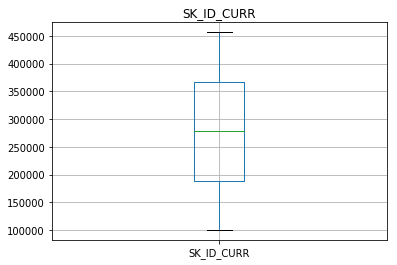

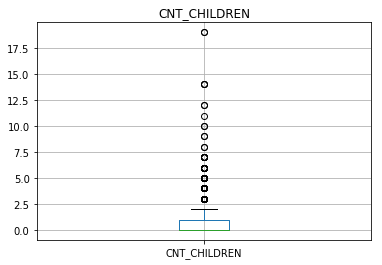

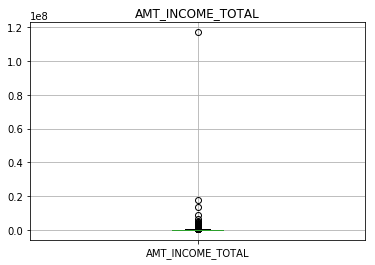

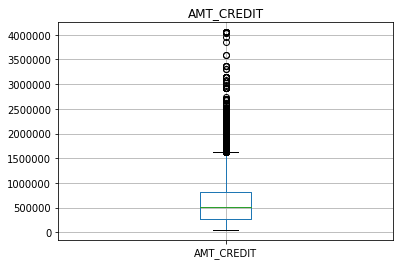

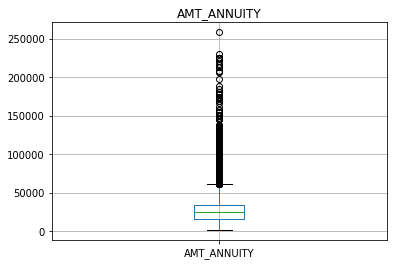

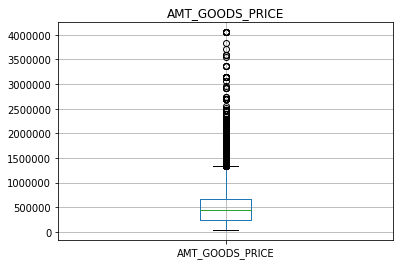

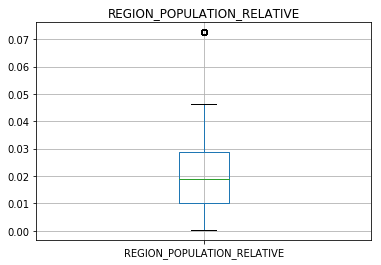

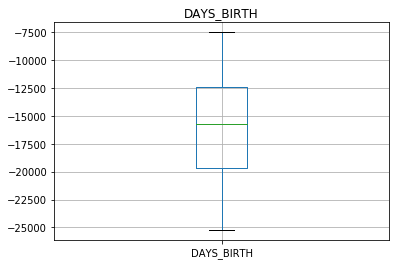

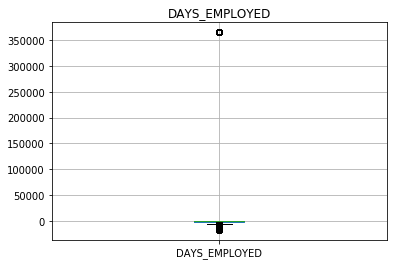

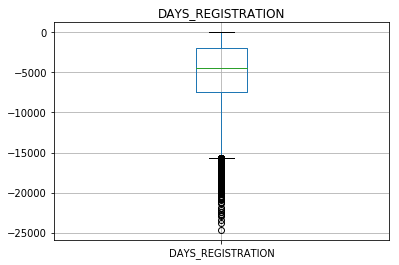

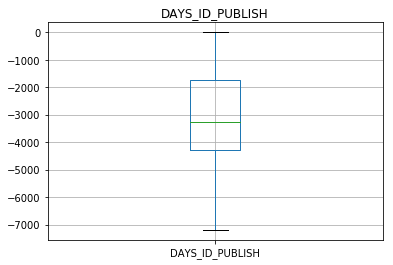

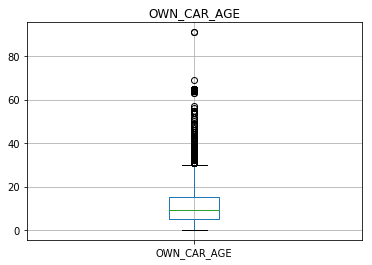

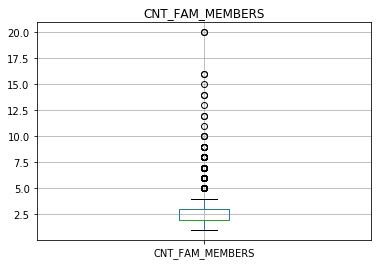

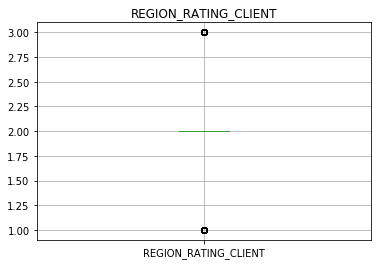

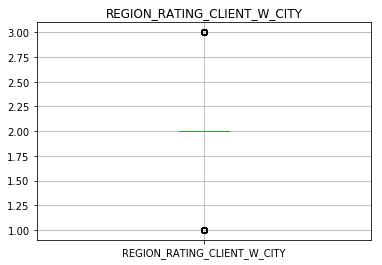

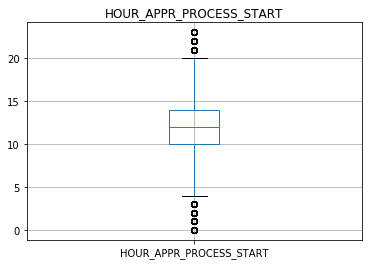

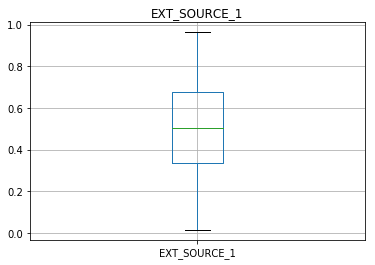

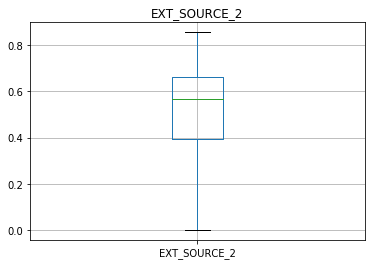

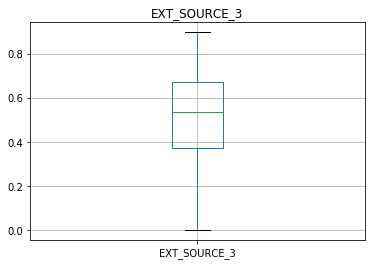

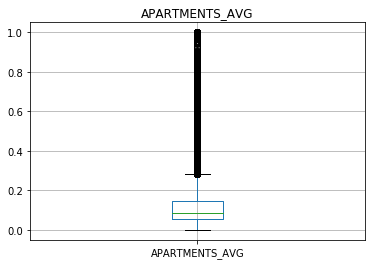

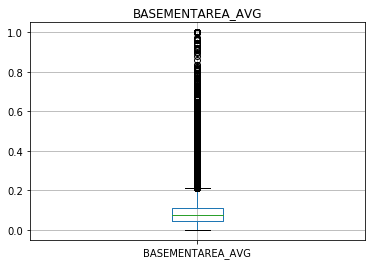

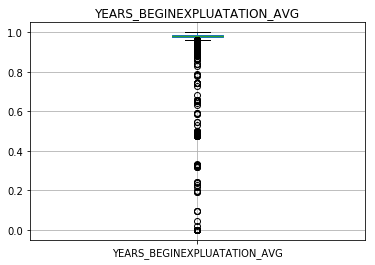

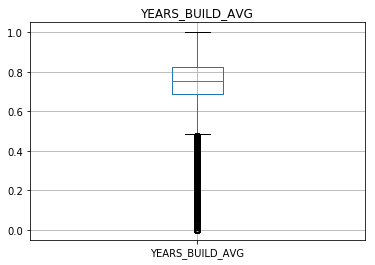

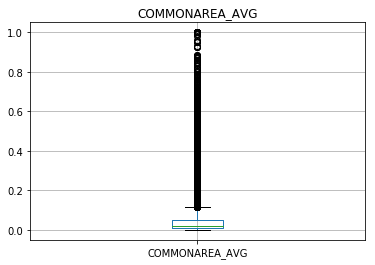

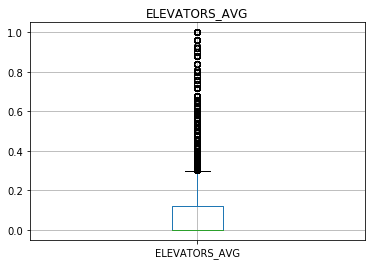

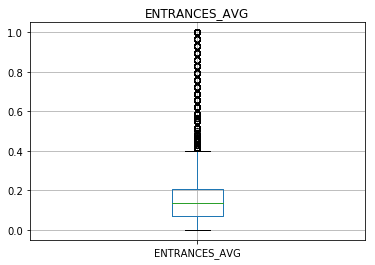

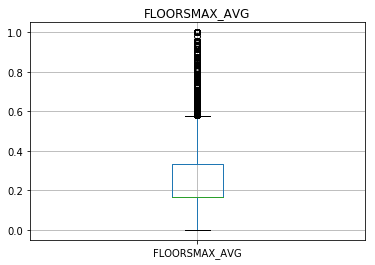

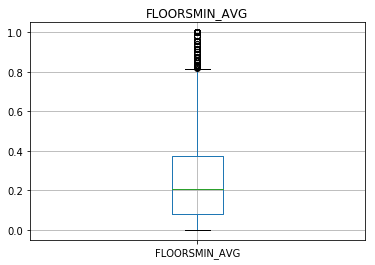

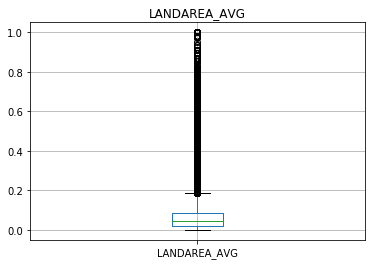

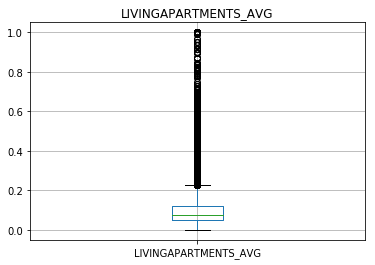

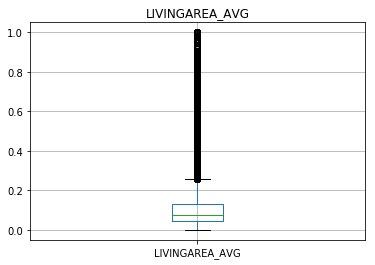

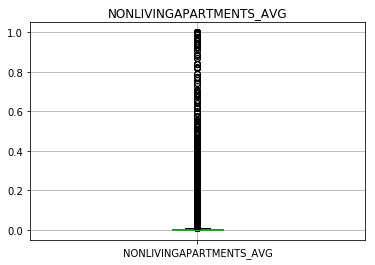

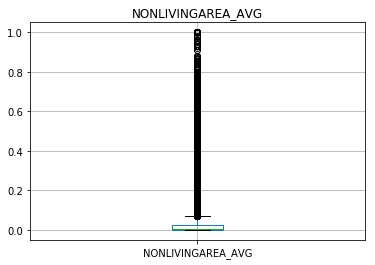

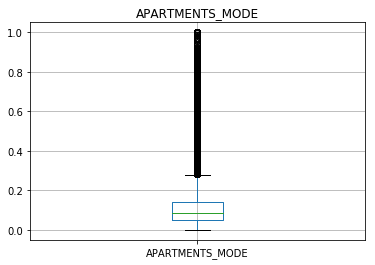

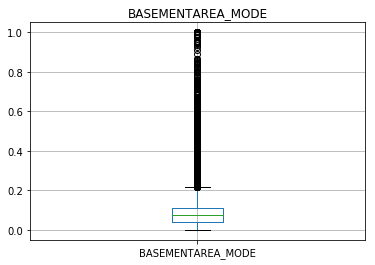

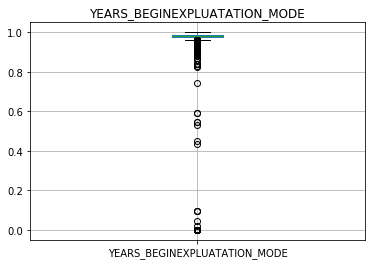

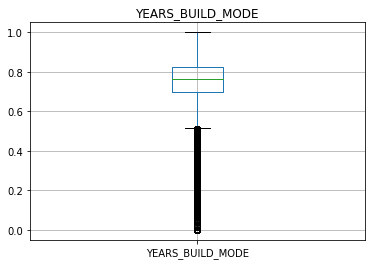

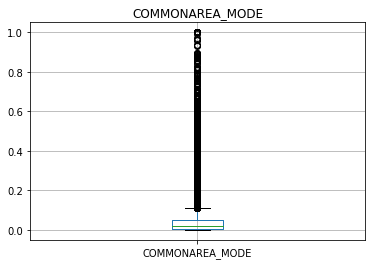

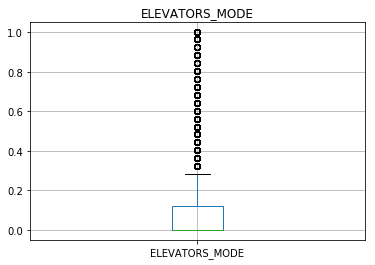

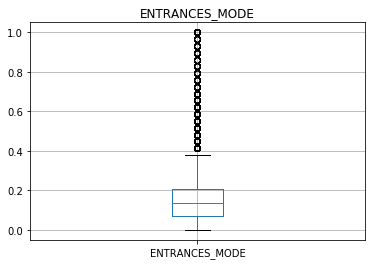

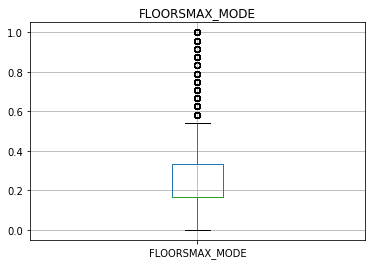

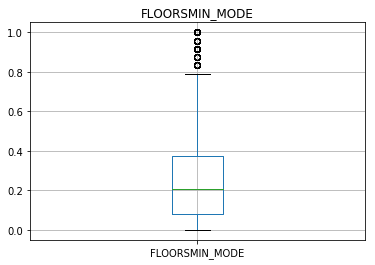

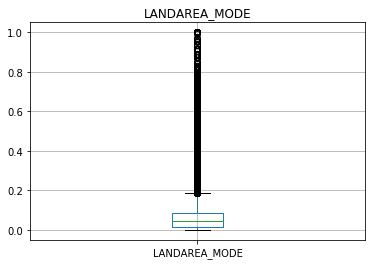

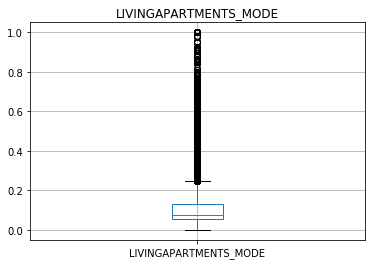

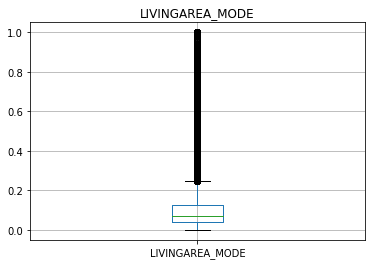

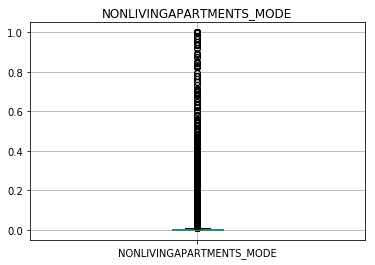

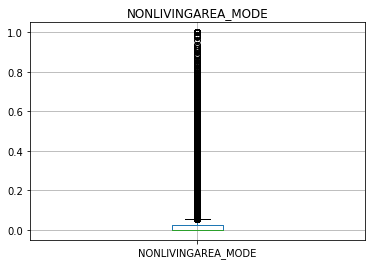

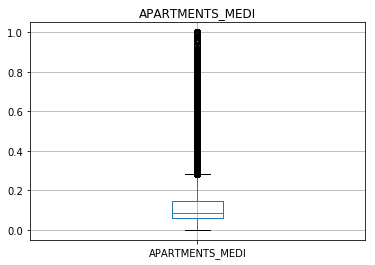

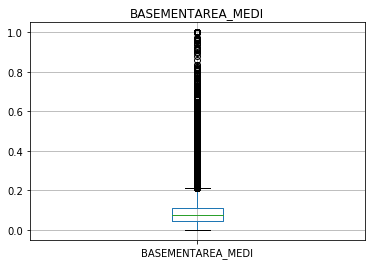

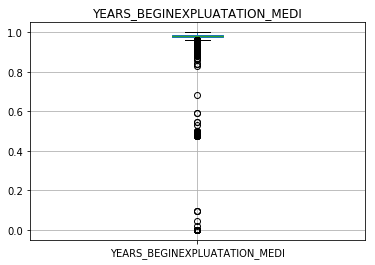

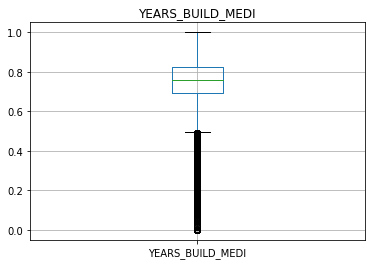

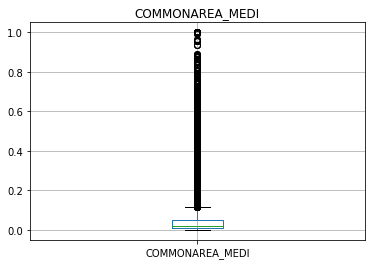

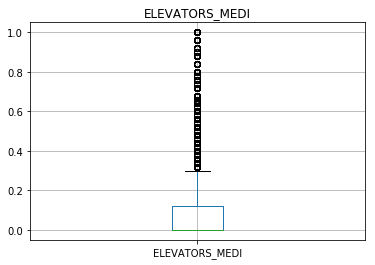

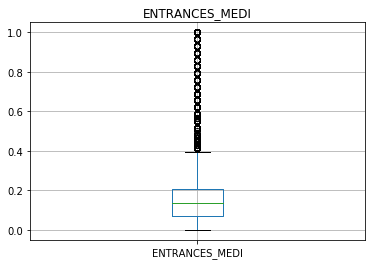

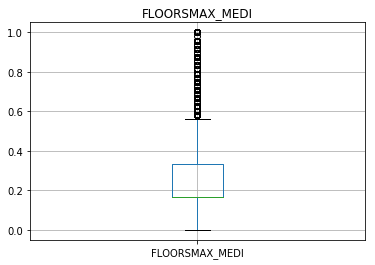

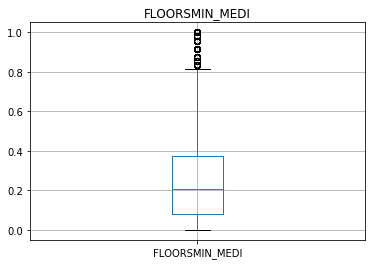

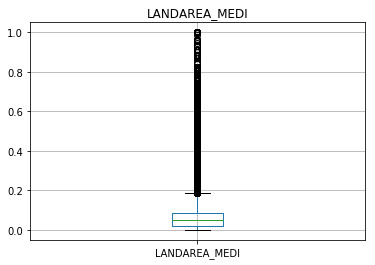

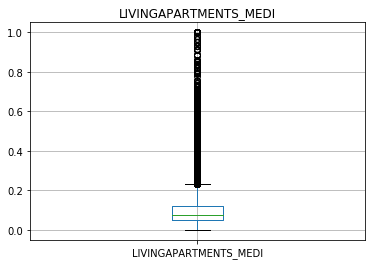

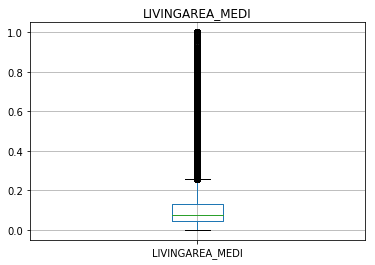

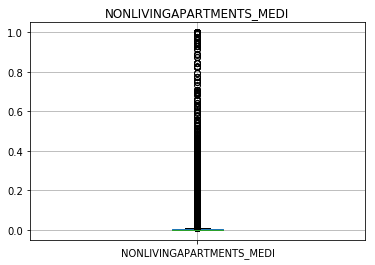

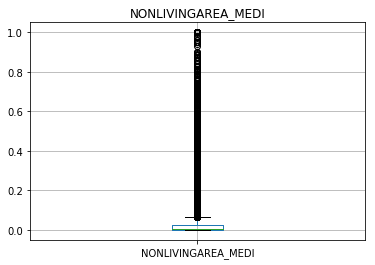

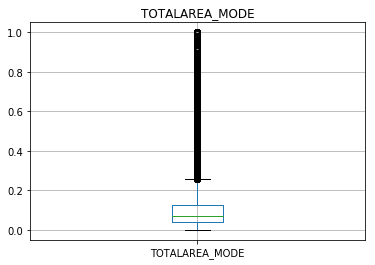

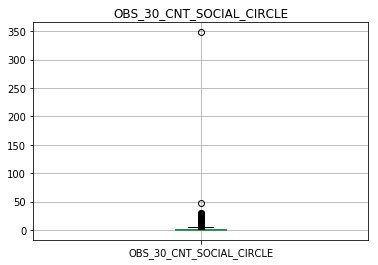

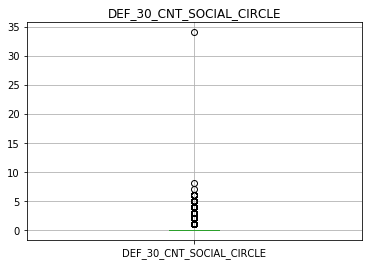

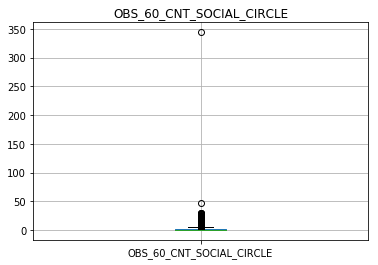

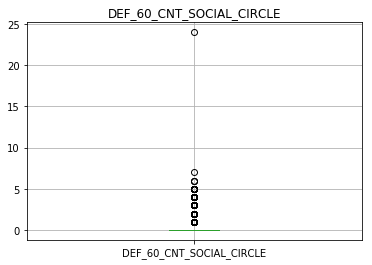

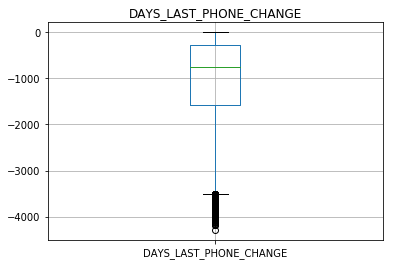

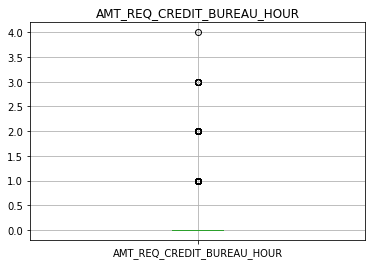

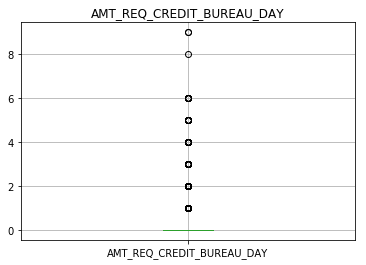

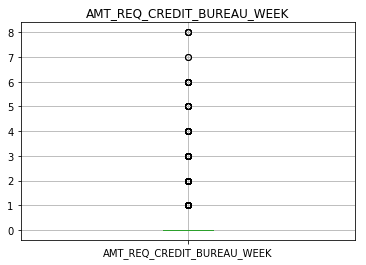

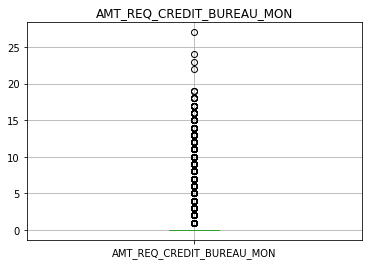

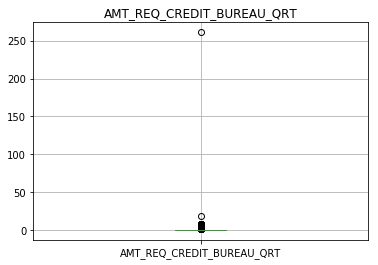

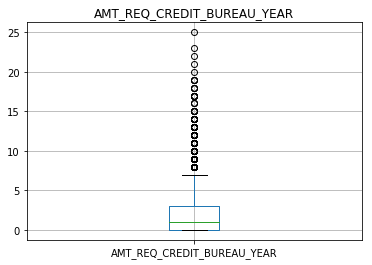

In [4]:
numeric_columns = df.columns[df.dtypes != 'object']
numeric_columns = df[numeric_columns].columns[(df[numeric_columns].apply(lambda x: len(x.unique()) != 2))]
print('final remain columns: %d' %len(numeric_columns))

for i,col in enumerate(numeric_columns):
    df[[col]].boxplot()
    plt.title(str(col))
    plt.show()

#Few columns might have outlier:
#1. AMT_INCOME_TOTAL -> Few people might have considerable income which are no good for model training <br />
#2. CNT_CHILDREN -> Same as first 1, few people might have a lots of kids which is not general case of current society <br />
#3. DAYS_EMPLOYED -> Abnormal value in this data

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


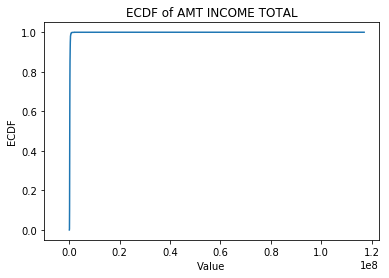

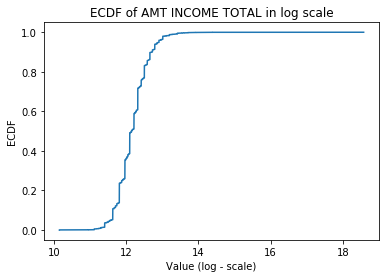

In [5]:
print(df.AMT_INCOME_TOTAL.describe())
AITdf = df.AMT_INCOME_TOTAL
cdf = pd.DataFrame(np.cumsum(list(AITdf.index)),index = AITdf.sort_values() )
plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF of AMT INCOME TOTAL')
plt.xlim([-0.1*1e8,cdf.index.max()*1.05])
plt.ylim([-0.05,1.05])
plt.show()

plt.plot(np.log(list(cdf.index)),cdf/cdf.max())
plt.xlabel('Value (log - scale)')
plt.ylabel('ECDF')
plt.title('ECDF of AMT INCOME TOTAL in log scale')
plt.ylim([-0.05,1.05])
plt.show()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


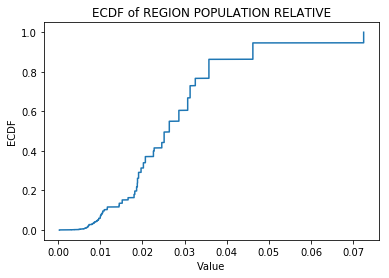

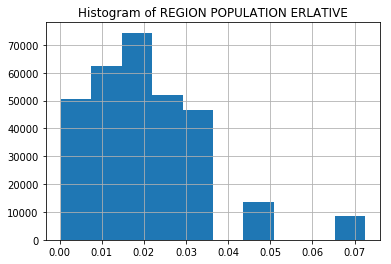

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [6]:
print(df['REGION_POPULATION_RELATIVE'].describe())
RPRdf = df.REGION_POPULATION_RELATIVE

cdf = pd.DataFrame(np.cumsum(list(RPRdf.index)), index = RPRdf.sort_values())

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF of REGION POPULATION RELATIVE')
plt.ylim([-0.05,1.05])
plt.show()

RPRdf.hist()
plt.title('Histogram of REGION POPULATION ERLATIVE')
plt.show()

print(RPRdf.value_counts())


count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


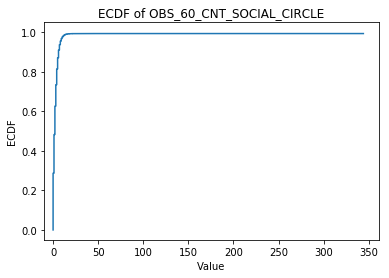

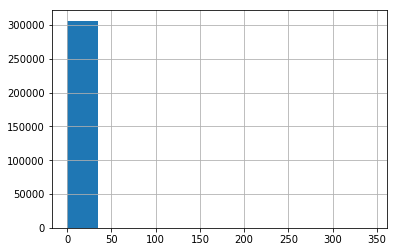

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [7]:
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].describe())
O6CSCdf = df['OBS_60_CNT_SOCIAL_CIRCLE']

cdf = pd.DataFrame(np.cumsum(list(O6CSCdf.index)),index = O6CSCdf.sort_values())

plt.plot(list(cdf.index), cdf/cdf.max())
plt.title('ECDF of OBS_60_CNT_SOCIAL_CIRCLE')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([-10, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05])
plt.show()

O6CSCdf.hist()
plt.show()
print(O6CSCdf.value_counts().sort_index(ascending = False))

注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

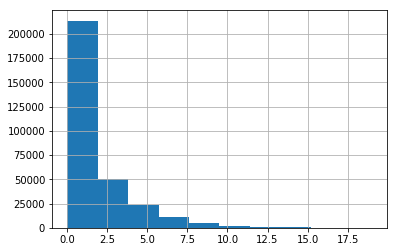

In [8]:
rangedf = O6CSCdf[O6CSCdf.apply(lambda v: 0<= v and v<20)]
rangedf.hist()
plt.show()